In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns

# Data Collection 

In [3]:
df = pd.read_csv("AB_NYC_2019.csv")  #reading in the csv file into a Pandas Data Frame
df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [4]:
df.shape  #checked to see size of the Data Frame

(48895, 15)

# Data Cleaning

In [4]:
df.drop(columns = ["host_id"], axis = 1, inplace = True)  #Dropping columns that are not needed
df.head()

,id,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
df.info  #wanted to see a concise summary of the Data Frame

<bound method DataFrame.info of              id                                               name  \
0          2539                 Clean & quiet apt home by the park   
1          2595                              Skylit Midtown Castle   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !   
3          3831                    Cozy Entire Floor of Brownstone   
4          5022   Entire Apt: Spacious Studio/Loft by central park   
...         ...                                                ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   
48891  36485057      Affordable room in Bushwick/East Williamsburg   
48892  36485431            Sunny Studio at Historical Neighborhood   
48893  36485609               43rd St. Time Square-cozy single bed   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen   

           host_name neighbourhood_group       neighbourhood  latitude  \
0               John            Brooklyn          Ken

In [138]:
df.describe()  #checked to see the measures of central tendencies

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,metro_prox
count,38834.000000,38834.000000,38834.000000,38834.000000,38834.000000,38834.000000,38834.000000,38834.000000,38834.000000
mean,40.728132,-73.951146,140.417109,5.862080,29.303239,1.373334,5.165113,114.868826,2.551950
std,0.054993,0.046698,149.950859,17.372859,48.190452,1.680376,26.298635,129.535047,1.912328
min,40.506410,-74.244420,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000,0.007221
25%,40.688640,-73.982470,69.000000,1.000000,3.000000,0.190000,1.000000,0.000000,0.871172
50%,40.721710,-73.954800,101.000000,2.000000,9.000000,0.720000,1.000000,55.000000,2.376502
75%,40.762990,-73.935020,170.000000,4.000000,33.000000,2.020000,2.000000,229.000000,3.850015
max,40.913060,-73.712990,5000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000,18.514002


# Feature Engineering

In [6]:
loc_coord = np.array(list(zip(df.latitude, df.longitude)))  #zipping the 2 columns of latitude & longitude into one
loc_coord

array([[ 40.64749, -73.97237],
       [ 40.75362, -73.98377],
       [ 40.80902, -73.9419 ],
       ...,
       [ 40.81475, -73.94867],
       [ 40.75751, -73.99112],
       [ 40.76404, -73.98933]])

In [7]:
len(loc_coord)  #found the length of the new zipped column

48895

In [8]:
transit_loc = [(40.711468, -74.012563),  #list of coordinates for New York City 
              (40.716478, -74.006555),
              (40.714656, -74.009817),
              (40.740011, -73.999646),
              (40.745994, -73.995183),
              (40.757178, -74.000161),
              (40.758998, -73.987801),
              (40.787208, -73.969433),
              (40.788378, -73.949864),
              (40.787858, -73.968232),
              (40.799554, -73.961537),
              (40.761858, -73.830988),
              (40.716595, -73.783095),
              (40.712432, -73.792708),
              (40.709569, -73.802664),
              (40.704364, -73.800604),
              (40.703453, -73.807471),
              (40.707747, -73.809187),
              (40.704884, -73.817599),
              (40.712692, -73.821204),
              (40.715815, -73.829958)]

In [9]:
len(transit_loc)

21

In [10]:
!pip install geopy  #installing required library 

In [11]:
import geopy.distance  #created a function to calculate the minimal distance from an Airbnb spot and nearest metro station
metro_prox = []
for airbnbloc in loc_coord:
    sortlist=[]
    for station in transit_loc:
        sortlist.append(geopy.distance.great_circle(airbnbloc,station).miles)
        #print(len(sortlist))
    metro_prox.append(min(sortlist))

In [12]:
df["metro_prox"] = metro_prox  #created a new column to show the calculated distance from metro station & Airbnb
df.head(10)

,id,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,metro_prox
0,2539,Clean & quiet apt home by the park,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,4.896516
1,2595,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,0.427299
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,1.217590
3,3831,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,3.270572
4,5022,Entire Apt: Spacious Studio/Loft by central park,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,0.764516
5,5099,Large Cozy 1 BR Apartment In Midtown East,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129,1.030297
6,5121,BlissArtsSpace!,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0,3.347495
7,5178,Large Furnished Room Near B'way,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220,0.433940
8,5203,Cozy Clean Guest Room - Family Apt,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0,0.335136
9,5238,Cute & Cozy Lower East Side 1 bdrm,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188,0.873218


In [13]:
df.isnull().sum()  #checked to see which columns had null values and how many of those 

id                                    0
name                                 16
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
metro_prox                            0
dtype: int64

In [14]:
df.dropna(subset = ["last_review", "reviews_per_month"], how = "any", inplace = True)  #removing all null values
df.shape

(38843, 16)

In [15]:
df.isnull().sum()  #checking to see if the data frame was reduced in size after dropping the NaN values

id                                 0
name                               6
host_name                         16
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
last_review                        0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
metro_prox                         0
dtype: int64

In [31]:
df["room_type"].value_counts()  #checking value counts for room_type column

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [32]:
df["neighbourhood_group"].value_counts()  #checking value counts for neighbhourhood_group column

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [33]:
df["neighbourhood"].value_counts()  #checking value counts for neighbhourhood column

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Rossville                1
Woodrow                  1
Richmondtown             1
Fort Wadsworth           1
New Dorp                 1
Name: neighbourhood, Length: 221, dtype: int64

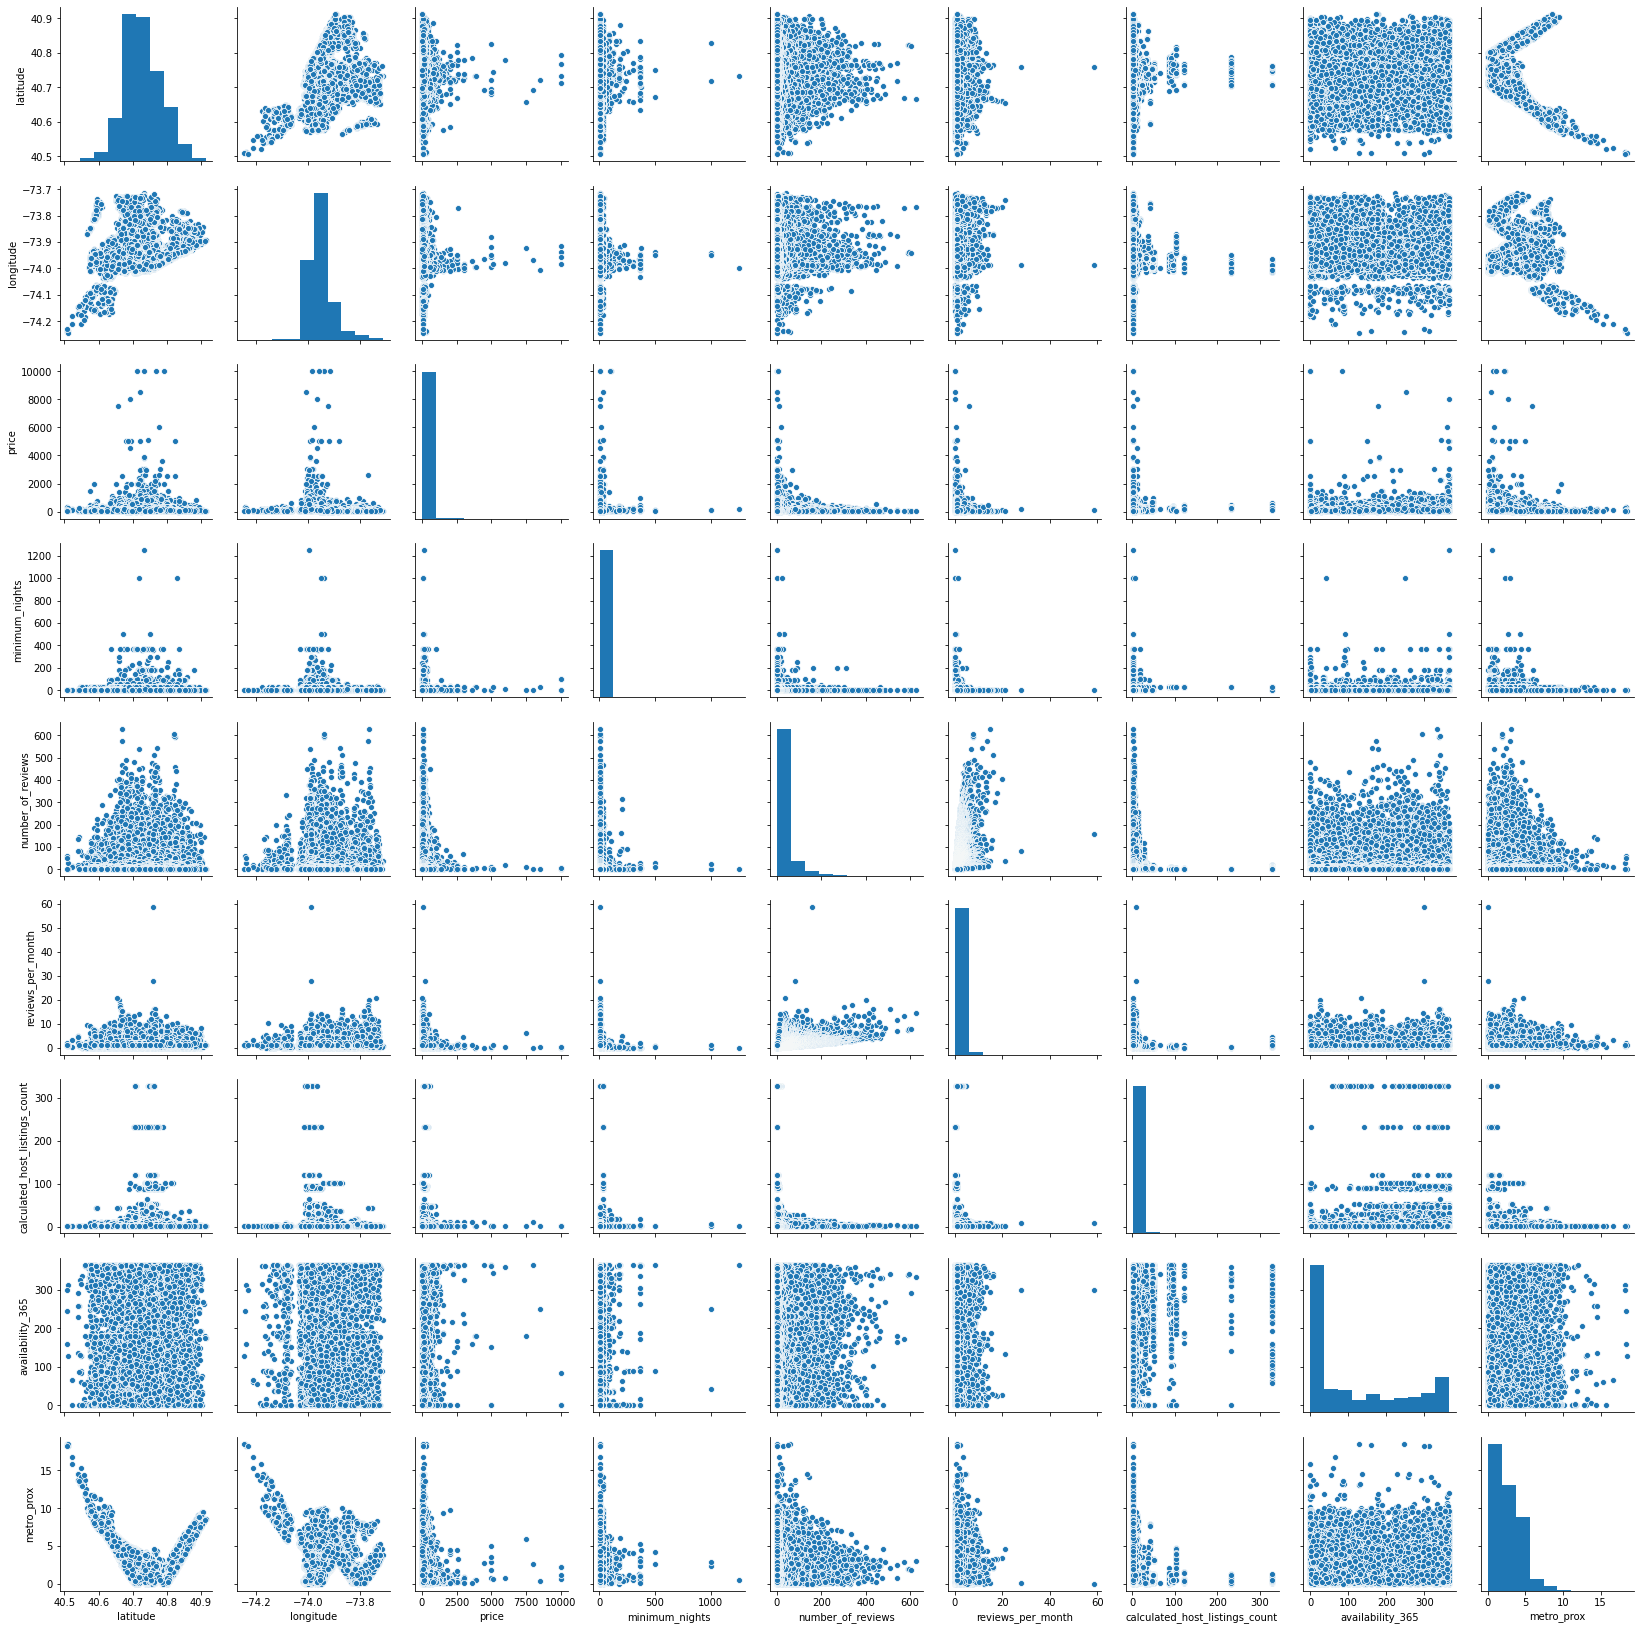

In [46]:
sns.pairplot(df)  #calling a pair plot to see the relationship between the variables in the dataset

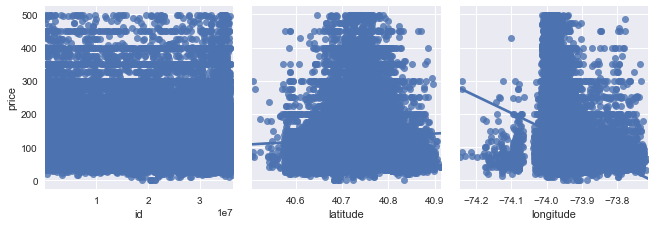

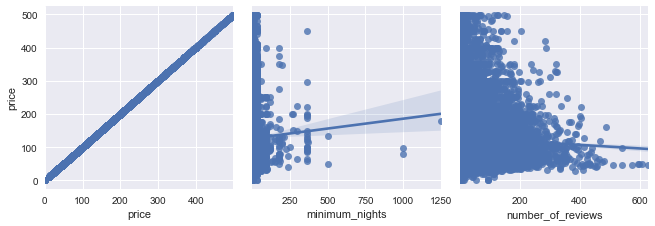

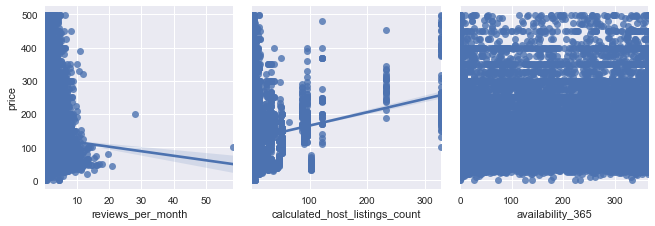

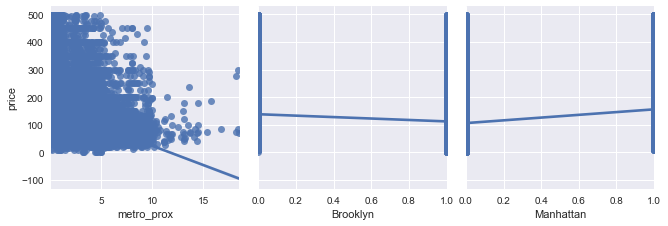

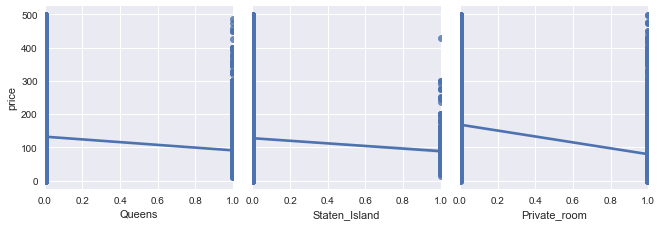

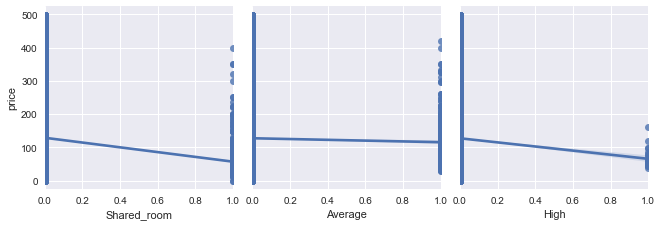

In [77]:
ft = dfs.columns  #ran a pairplot for all the features in my model against the target
n = 3  
row_groups = [ft[i:i+n] for i in range(0, len(ft), n) ]
for i in row_groups:
    pp = sns.pairplot(data=dfs, y_vars=['price'],x_vars=i, kind="reg", height=3)

In [47]:
df_corr_matrix = df.corr() 
df_corr_matrix  #computed a correlation matrix for data set to see if it suggested that any features were collinear

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,metro_prox
latitude,1.000000,0.088152,0.031318,0.024808,-0.008746,-0.010142,0.004326,-0.022228,-0.530027
longitude,0.088152,1.000000,-0.155361,-0.055418,0.054681,0.145948,-0.093325,0.102540,0.244204
price,0.031318,-0.155361,1.000000,0.025506,-0.035938,-0.030608,0.052903,0.078234,-0.175329
minimum_nights,0.024808,-0.055418,0.025506,1.000000,-0.069368,-0.121702,0.073479,0.101686,-0.051949
number_of_reviews,-0.008746,0.054681,-0.035938,-0.069368,1.000000,0.549868,-0.059784,0.193557,0.017571
reviews_per_month,-0.010142,0.145948,-0.030608,-0.121702,0.549868,1.000000,-0.009421,0.185791,0.037241
calculated_host_listings_count,0.004326,-0.093325,0.052903,0.073479,-0.059784,-0.009421,1.000000,0.182911,-0.112574
availability_365,-0.022228,0.102540,0.078234,0.101686,0.193557,0.185791,0.182911,1.000000,0.068598
metro_prox,-0.530027,0.244204,-0.175329,-0.051949,0.017571,0.037241,-0.112574,0.068598,1.000000


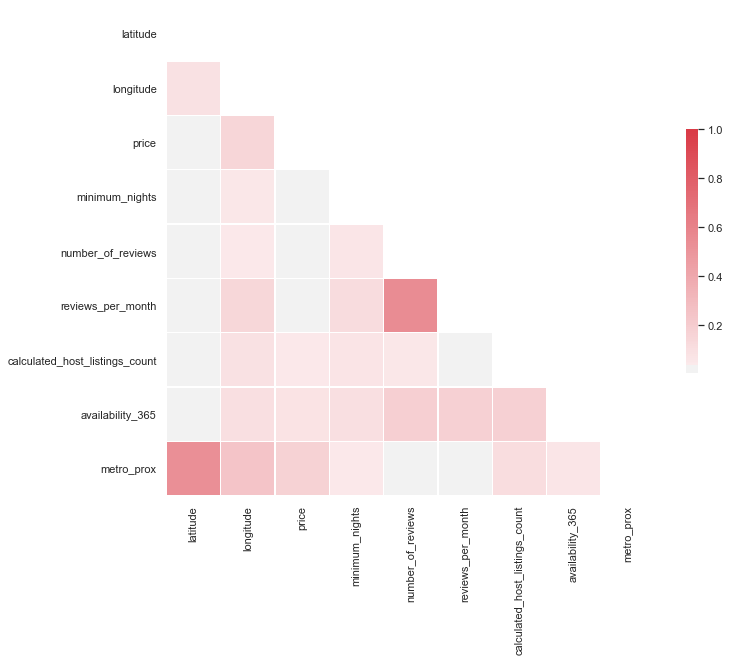

In [49]:
sns.set(style="white")  #using a heat map to display the visuals for the correlations in the dataset
# Compute the correlation matrix
corr = np.abs(df.corr())
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize = (11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask = mask, cmap = cmap, vmax = 1, center = 0,
            square = True, linewidths = .5, cbar_kws = {"shrink": .5})

In [58]:
df.price.describe()  #checked to see statistical summary of price column as well as any outliers

count    38843.000000
mean       142.317947
std        196.945624
min          0.000000
25%         69.000000
50%        101.000000
75%        170.000000
max      10000.000000
Name: price, dtype: float64

In [63]:
df[df["price"] == 10000]  #checked to see how many outlier rows there were 

,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,metro_prox
9151,Furnished room in Astoria apartment,Kathrine,Queens,Astoria,40.7681,-73.91651,Private room,10000,100,2,2016-02-13,0.04,1,0,2.237942
17692,Luxury 1 bedroom apt. -stunning Manhattan views,Erin,Brooklyn,Greenpoint,40.7326,-73.95739,Entire home/apt,10000,5,5,2017-07-27,0.16,1,0,2.184246


In [64]:
df.drop([9151, 17692], axis = 0, inplace = True)  #dropping outliers

In [65]:
df[df["price"] == 10000]  #double checking to see if outliers were officially removed 

,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,metro_prox


In [21]:
df = df[df["price"] < 500] 

Text(0.5, 1.0, 'AirBnB')

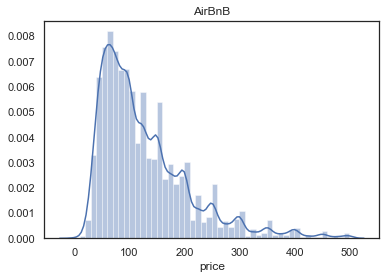

In [101]:
sns.distplot(df2.price).set_title('AirBnB') #checked to see the skewness of target variable of price

In [137]:
df.sort_values("price", ascending = False).head(10)

,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,metro_prox
33208,HUGE APT on border of EAST VILLAGE & GRAMERCY!,Mike,Manhattan,Gramercy,40.73338,-73.98315,Entire home/apt,499,4,41,2019-06-30,3.31,1,10,0.977623
37118,✨✨Union Square Duplex LOFT•••4 BEDS✨✨MUST SEE ...,Bob,Manhattan,Gramercy,40.73670,-73.98985,Entire home/apt,499,5,28,2019-06-19,3.36,1,145,0.561551
4443,1910 Town House in leafy Kensington,Jacques,Brooklyn,Kensington,40.64638,-73.97723,Entire home/apt,499,7,2,2015-08-11,0.03,1,31,4.863339
18456,Huge 3BR 2BA lux in LES! 2min walk to Train!,Kiev,Manhattan,Chinatown,40.71595,-73.98993,Entire home/apt,499,30,70,2019-06-24,2.04,1,0,0.871404
46234,⭐ Oversized 4BR Loft In Prime Location!,Eduardo,Manhattan,Chelsea,40.73863,-73.99965,Entire home/apt,499,2,1,2019-06-20,1.00,1,115,0.095418
25823,️CENTRALLY LOCATED️- Great for Families + Groups,Devin,Manhattan,Hell's Kitchen,40.76154,-73.99306,Entire home/apt,499,2,16,2019-01-25,0.75,1,240,0.326494
18031,Modern Downtown Space for Families: 3 bed | 2 ...,Nick,Manhattan,Chinatown,40.71655,-73.99203,Entire home/apt,499,1,116,2019-06-30,3.24,4,30,0.760678
44241,2 Bedroom/2 Bath Hell’s Kitchen Gem with views.,Stephen,Manhattan,Hell's Kitchen,40.76676,-73.99146,Entire home/apt,499,3,3,2019-06-23,2.09,1,1,0.569463
45516,AMAZING 2 BEDROOMS IN HEART OF CHELSEA!!!,Isra,Manhattan,Chelsea,40.74437,-74.00007,Entire home/apt,499,3,5,2019-06-25,4.05,1,199,0.279344
45391,Art-Gallery Penthouse: 3BD Home in Midtown East,Yves,Manhattan,Midtown,40.75613,-73.96904,Entire home/apt,499,5,5,2019-06-17,3.19,1,189,1.001687


In [99]:
df.price.describe()  #checked the central tendency of the price target

count    38107.000000
mean       126.938988
std         81.859058
min          0.000000
25%         67.000000
50%        100.000000
75%        160.500000
max        499.000000
Name: price, dtype: float64

In [100]:
df.shape  #checked to see new shape of data set

(38107, 15)

In [86]:
df.room_type.value_counts()  #checked to see the different value counts of room types

Entire home/apt    20326
Private room       17662
Shared room          846
Name: room_type, dtype: int64

In [109]:
df.neighbourhood_group.value_counts()  #checked to see different value counts of neighborhood groups

Manhattan        16627
Brooklyn         16444
Queens            4573
Bronx              876
Staten Island      314
Name: neighbourhood_group, dtype: int64

In [34]:
ng = pd.get_dummies(df.neighbourhood_group).iloc[:, 1:]  #creating dummies for categorical variables
rt = pd.get_dummies(df.room_type).iloc[:, 1:]
nor = pd.get_dummies(df["Total Number of Reviews"]).iloc[:, 1:]
df = pd.concat([df, ng, rt, nor], axis = 1)  #concatting dummies into original Data Frame

In [35]:
df.head()

,id,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,...,metro_prox,Total Number of Reviews,Brooklyn,Manhattan,Queens,Staten Island,Private room,Shared room,Average,High
0,2539,Clean & quiet apt home by the park,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,...,4.896516,Low,1,0,0,0,1,0,0,0
1,2595,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,...,0.427299,Low,0,1,0,0,0,0,0,0
3,3831,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,...,3.270572,Average,1,0,0,0,0,0,1,0
4,5022,Entire Apt: Spacious Studio/Loft by central park,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,...,0.764516,Low,0,1,0,0,0,0,0,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,...,1.030297,Low,0,1,0,0,0,0,0,0


# Hypothesis Testing

In [105]:
from scipy import stats  #importing library to perform ANOVA testings

H0: There is no difference between the means of price and the room types
HA: There is a difference between the means of price and the room types

In [108]:
stats.f_oneway(df["price"][df['room_type'] == 'Entire home/apt'],
                df['price'][df['room_type'] == 'Private room'], 
                df['price'][df['room_type'] == 'Shared room'])

F_onewayResult(statistic=3177.2339284893114, pvalue=0.0)

Based on the P-Value, I can reject the null hypothesis

H0: There is no difference between the means of price and the neighborhood groups
HA: There is a difference between the means of price and the neighborhood groups 

In [110]:
stats.f_oneway(df["price"][df['neighbourhood_group'] == 'Manhattan'],
                df['price'][df['neighbourhood_group'] == 'Brooklyn'], 
                df['price'][df['neighbourhood_group'] == 'Queens'])

F_onewayResult(statistic=912.3283323935678, pvalue=0.0)

Based on the P-Value, I can reject the null hypothesis

In [122]:
df.number_of_reviews.describe()

count    38834.000000
mean        29.303239
std         48.190452
min          1.000000
25%          3.000000
50%          9.000000
75%         33.000000
max        629.000000
Name: number_of_reviews, dtype: float64

In [99]:
df.number_of_reviews.value_counts()

1      5101
2      3397
3      2466
4      1954
5      1575
       ... 
357       1
389       1
308       1
441       1
607       1
Name: number_of_reviews, Length: 392, dtype: int64

In [23]:
bins = [1, 211, 420, 629]  #defining bins

In [24]:
review_bins = ["Low", "Average", "High"]  #labeling the bins

In [25]:
df["Total Number of Reviews"] = pd.cut(df["number_of_reviews"], bins, labels = review_bins) #making a new column with binned values

/Users/jasonjoseph/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
df.head()  #checked to see new column that was created from binning

,id,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,metro_prox,Total Number of Reviews
0,2539,Clean & quiet apt home by the park,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,4.896516,Low
1,2595,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,0.427299,Low
3,3831,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,3.270572,Average
4,5022,Entire Apt: Spacious Studio/Loft by central park,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,0.764516,Low
5,5099,Large Cozy 1 BR Apartment In Midtown East,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129,1.030297,Low


H0: There is no difference between the means of price and number of reviews
HA: There is a difference between the means of price and number of reviews 

In [129]:
stats.f_oneway(df["price"][df['Review_Bins'] == 'Low'],
                df['price'][df['Review_Bins'] == 'Average'], 
                df['price'][df['Review_Bins'] == 'Good'])

F_onewayResult(statistic=8.323826245836905, pvalue=0.00024316648460395008)

Based on the P-Value, I can reject the null hypothesis

In [168]:
df2.rename(columns = {"neighbourhood_group": "Neighborhood Group", "room_type": "Room Type", "number_of_reviews": "Number_of_Reviews"}, inplace = True)
df2.head() #renamed columns to display better on axis

,name,host_name,Neighborhood Group,neighbourhood,latitude,longitude,Room Type,price,minimum_nights,Number of Reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,metro_prox,Review_Bins
0,Clean & quiet apt home by the park,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,4.896516,Low
1,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,0.427299,Low
3,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,3.270572,Average
4,Entire Apt: Spacious Studio/Loft by central park,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,0.764516,Low
5,Large Cozy 1 BR Apartment In Midtown East,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129,1.030297,Low


# GRAPHS

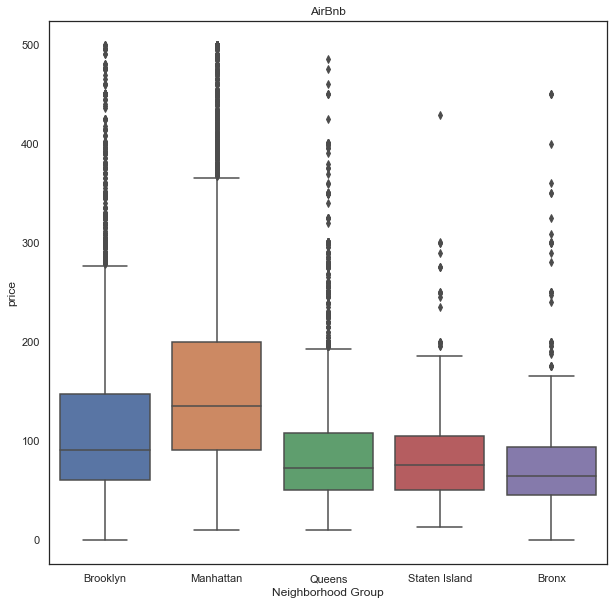

In [166]:
figure,ax = plt.subplots(figsize=(10,10))  #boxplot of price & neighborhood groups
sns.boxplot(x = "Neighborhood Group", y = "price", data = df2).set_title("AirBnb")
plt.savefig('Box_NGroup.png')

Shows that price is influenced by the borough the Airbnb is located in; Manhattan having the highest average of price.

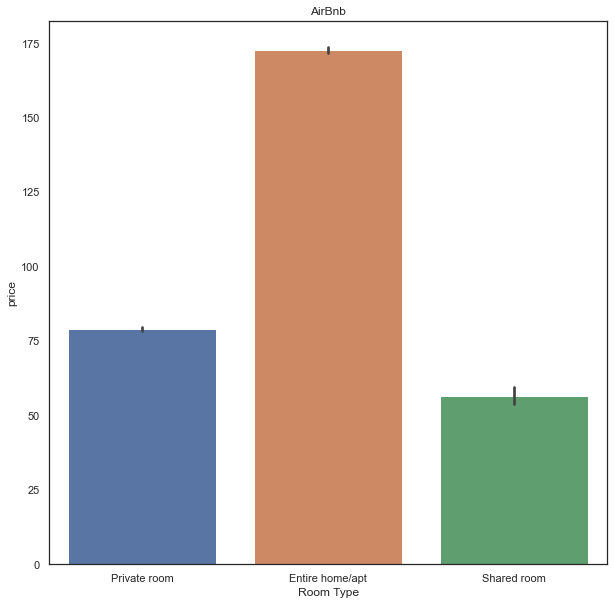

In [165]:
figure,ax = plt.subplots(figsize=(10,10))  #bar graph of price & room types
sns.barplot(x = "Room Type", y = "price", data = df2).set_title("AirBnb")
plt.savefig('Bar_Room.png')

Shows that Entire home/apt room type offers the highest price

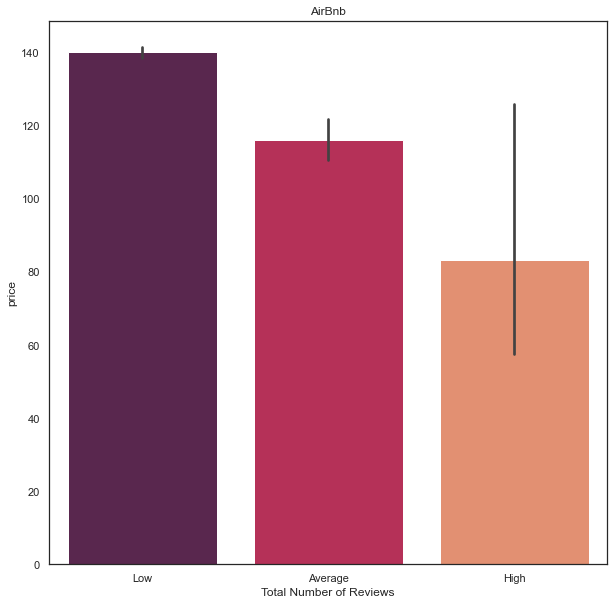

In [207]:
figure,ax = plt.subplots(figsize=(10,10))  #histogram of price & number of reviews
sns.barplot(x = "Total Number of Reviews", y = "price", data = df, palette = "rocket").set_title("AirBnb")
plt.savefig('His_Reviews.png')

The number of reviews does not determine the pricing of the Airbnb. You could have more reviews on a specific Airbnb however that doesn't mean that they are necessarily good reviews.

# MODELING

In [27]:
from scipy.stats.stats import pearsonr
import scipy as sp
from scipy import stats
from scipy.stats import skew,norm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
plt.style.use('seaborn')
from sklearn import metrics

In [298]:
df.columns

Index(['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'metro_prox',
       'Total Number of Reviews', 'Brooklyn', 'Manhattan', 'Queens',
       'Staten Island', 'Private room', 'Shared room', 'Average', 'High'],
      dtype='object')

In [226]:
mlr_model = ols(formula = "price ~ neighbourhood_group + neighbourhood + latitude + longitude + room_type + minimum_nights + number_of_reviews + last_review + reviews_per_month + calculated_host_listings_count + availability_365", data = df).fit()  #Without scaling the numbers
mlr_model.summary()  #output of all my features that came with dataset

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     18.73
Date:                Fri, 19 Jun 2020   Prob (F-statistic):               0.00
Time:                        13:32:43   Log-Likelihood:            -2.0846e+05
No. Observations:               38107   AIC:                         4.209e+05
Df Residuals:                   36123   BIC:                         4.378e+05
Df Model:                        1983                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                     -3.4e+04   3961.512     -8.583      0.000   -4.18e+04   -2.62e+04
neighbourhood_group[T.Brooklyn]               -26.0868     15.650     -1.667      0.096     -56.761       4.587
neighbourhood_group[T.Manhattan]               12.3220     12.233      1.007      0.314     -11.655      36.299
neighbourhood_group[T.Queens]                  29.4285     13.455      2.187      0.029       3.056      55.801
neighbourhood_group[T.Staten Island]         -124.1893     21.099     -5.886      0.000    -165.544     -82.834
neighbourhood[T.Arden Heights]                -48.2763     30.311     -1.593      0.111    -107.686      11.133
neighbourhood[T.Arrochar]                      17.5580     14.345      1.224      0.221     -10.558      45.674
neighbourhood[T.Arverne]                       44.0726     10.013      4.401      0.000      24.446      63.699
neighbourhood[T.Astoria]                      -43.8467      6.242     -7.024      0.000     -56.082     -31.611
neighbourhood[T.Bath Beach]                   -48.2495     15.496     -3.114      0.002     -78.623     -17.876
neighbourhood[T.Battery Park City]            -10.4658     10.528     -0.994      0.320     -31.100      10.169
neighbourhood[T.Bay Ridge]                    -41.9614      6.449     -6.507      0.000     -54.601     -29.321
neighbourhood[T.Bay Terrace]                   46.4021     26.698      1.738      0.082      -5.927      98.731
neighbourhood[T.Bay Terrace, Staten Island]   -21.2858     41.836     -0.509      0.611    -103.285      60.713
neighbourhood[T.Baychester]                   -13.5113     26.321     -0.513      0.608     -65.102      38.079
neighbourhood[T.Bayside]                       22.3272     11.494      1.943      0.052      -0.201      44.855
neighbourhood[T.Bayswater]                     22.9168     18.936      1.210      0.226     -14.198      60.032
neighbourhood[T.Bedford-Stuyvesant]             2.1862      2.700      0.810      0.418      -3.107       7.479
neighbourhood[T.Belle Harbor]                  42.9608     27.019      1.590      0.112      -9.998      95.919
neighbourhood[T.Bellerose]                     49.2583     21.067      2.338      0.019       7.967      90.549
neighbourhood[T.Belmont]                       -0.8472     16.585     -0.051      0.959     -33.355      31.661
neighbourhood[T.Bensonhurst]                  -41.8867      8.167     -5.129      0.000     -57.894     -25.880
neighbourhood[T.Bergen Beach]                 -11.5237     21.107     -0.546      0.585     -52.893      29.846
neighbourhood[T.Boerum Hill]                   17.2880      5.520      3.132      0.002       6.468      28.108
neighbourhood[T.Borough Park]                 -39.2700     

In [238]:
mlr_model = ols(formula = "price ~ neighbourhood_group + latitude + longitude + room_type + number_of_reviews + metro_prox", data = df).fit()  #Without scaling the numbers
mlr_model.summary()  #removed some features based on coefficients and p-vlaues

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     2843.
Date:                Fri, 19 Jun 2020   Prob (F-statistic):               0.00
Time:                        14:21:42   Log-Likelihood:            -2.1131e+05
No. Observations:               38107   AIC:                         4.226e+05
Df Residuals:                   38096   BIC:                         4.227e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                            -5372.5277   1023.710     -5.248      0.000   -7379.025   -3366.030
neighbourhood_group[T.Brooklyn]        -37.5254      2.710    -13.849      0.000     -42.836     -32.215
neighbourhood_group[T.Manhattan]       -16.8893      2.644     -6.387      0.000     -22.072     -11.706
neighbourhood_group[T.Queens]          -36.0369      2.768    -13.021      0.000     -41.461     -30.612
neighbourhood_group[T.Staten Island]   -60.4014      5.138    -11.755      0.000     -70.473     -50.330
room_type[T.Private room]              -82.8854      0.660   -125.654      0.000     -84.178     -81.592
room_type[T.Shared room]              -108.5301      2.188    -49.597      0.000    -112.819    -104.241
latitude                              -212.3391      9.826    -21.611      0.000    -231.598    -193.080
longitude                             -192.5825     11.332    -16.995      0.000    -214.794    -170.371
number_of_reviews                       -0.0227      0.007     -3.459      0.001      -0.036      -0.010
metro_prox                              -9.6082      0.287    -33.444      0.000     -10.171      -9.045
==============================================================================
Omnibus:                    14318.852   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            64657.206
Skew:                           1.806   Prob(JB):                         0.00
Kurtosis:                       8.261   Cond. No.                     2.95e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.95e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [88]:
dfs = df.drop(["name", "id", "host_name", "neighbourhood_group", "neighbourhood", "room_type", "last_review", "Total Number of Reviews"], axis =1)
#created a new data frame with out the catergorical feature columns

In [94]:
dfs.rename(columns = {"Staten Island": "Staten_Island", "Private room": "Private_room", "Shared room": "Shared_room"}, inplace = True)
dfs.head() #renamed columns to display better on axis

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,metro_prox,Brooklyn,Manhattan,Queens,Staten_Island,Private_room,Shared_room,Average,High
0,40.64749,-73.97237,149,1,9,0.21,6,365,4.896516,1,0,0,0,1,0,0,0
1,40.75362,-73.98377,225,1,45,0.38,2,355,0.427299,0,1,0,0,0,0,0,0
3,40.68514,-73.95976,89,1,270,4.64,1,194,3.270572,1,0,0,0,0,0,1,0
4,40.79851,-73.94399,80,10,9,0.10,1,0,0.764516,0,1,0,0,0,0,0,0
5,40.74767,-73.97500,200,3,74,0.59,1,129,1.030297,0,1,0,0,0,0,0,0


In [95]:
#Scaling the Model so the features are represented in standard deviations as opposed to it's normal numbers
scaler = StandardScaler()
scaler.fit(dfs)
df_scaled = scaler.transform(dfs)
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = list(dfs.columns)

In [96]:
mlr_model = ols(formula = "price ~ reviews_per_month + calculated_host_listings_count + availability_365 + minimum_nights + Brooklyn + Manhattan + Queens + Staten_Island + Private_room + Shared_room + Average + latitude + longitude + number_of_reviews + metro_prox", data = df_scaled).fit()
mlr_model.summary()  #SCALED & added my feature engineered column

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     2058.
Date:                Sat, 20 Jun 2020   Prob (F-statistic):               0.00
Time:                        16:50:54   Log-Likelihood:                -42762.
No. Observations:               38107   AIC:                         8.556e+04
Df Residuals:                   38091   BIC:                         8.569e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                       2.169e-14      0.004    5.7e-12      1.000      -0.007       0.007
reviews_per_month                  0.0236      0.005      5.020      0.000       0.014       0.033
calculated_host_listings_count     0.0183      0.004      4.611      0.000       0.011       0.026
availability_365                   0.1328      0.004     32.390      0.000       0.125       0.141
minimum_nights                    -0.0651      0.004    -16.738      0.000      -0.073      -0.058
Brooklyn                          -0.1722      0.016    -10.644      0.000      -0.204      -0.141
Manhattan                         -0.0754      0.016     -4.801      0.000      -0.106      -0.045
Queens                            -0.1223      0.011    -11.332      0.000      -0.143      -0.101
Staten_Island                     -0.0678      0.006    -12.171      0.000      -0.079      -0.057
Private_room                      -0.5098      0.004   -128.807      0.000      -0.518      -0.502
Shared_room                       -0.2043      0.004    -52.849      0.000      -0.212      -0.197
Average                            0.0116      0.005      2.510      0.012       0.003       0.021
latitude                          -0.1206      0.007    -18.346      0.000      -0.133      -0.108
longitude                         -0.1289      0.006    -20.079      0.000      -0.142      -0.116
number_of_reviews                 -0.0616      0.005    -11.274      0.000      -0.072      -0.051
metro_prox                        -0.2323      0.007    -35.131      0.000      -0.245      -0.219
==============================================================================
Omnibus:                    14193.376   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            63828.839
Skew:                           1.789   Prob(JB):                         0.00
Kurtosis:                       8.234   Cond. No.                         11.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
X = df_scaled.drop(["price"], axis = 1)  #checking to see if just scaling target changed model output

In [53]:
Y2 = dfs.price  #checking to see if just scaling target changed model output

In [56]:
import statsmodels.api as sm  #scaled one 
from statsmodels.formula.api import ols
X_fit = sm.add_constant(X)
Y = dfs.price.values.reshape(-1,1)   
lr_model = sm.OLS(Y, X_fit).fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     1821.
Date:                Sat, 20 Jun 2020   Prob (F-statistic):               0.00
Time:                        15:10:03   Log-Likelihood:            -2.1060e+05
No. Observations:               38107   AIC:                         4.212e+05
Df Residuals:                   38089   BIC:                         4.214e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                            126.9390      0.312    407.481      0.000     126.328     127.550
id                                 2.9657      0.426      6.968      0.000       2.132       3.800
latitude                          -9.7942      0.538    -18.215      0.000     -10.848      -8.740
longitude                        -10.6687      0.526    -20.298      0.000     -11.699      -9.639
minimum_nights                    -5.2140      0.319    -16.346      0.000      -5.839      -4.589
number_of_reviews                 -2.7870      0.582     -4.785      0.000      -3.929      -1.646
reviews_per_month                 -0.0547      0.482     -0.113      0.910      -1.000       0.891
calculated_host_listings_count     1.2891      0.326      3.948      0.000       0.649       1.929
availability_365                  10.8804      0.336     32.399      0.000      10.222      11.539
metro_prox                       -19.1309      0.541    -35.351      0.000     -20.192     -18.070
Brooklyn                         -13.8576      1.324    -10.465      0.000     -16.453     -11.262
Manhattan                         -6.0587      1.284     -4.718      0.000      -8.576      -3.542
Queens                            -9.9340      0.883    -11.247      0.000     -11.665      -8.203
Staten_Island                     -5.5657      0.456    -12.205      0.000      -6.460      -4.672
Private_room                     -41.8685      0.324   -129.076      0.000     -42.504     -41.233
Shared_room                      -16.8435      0.317    -53.186      0.000     -17.464     -16.223
Average                            0.5700      0.389      1.464      0.143      -0.193       1.333
High                               0.1283      0.330      0.388      0.698      -0.519       0.776
==============================================================================
Omnibus:                    14177.583   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            63709.821
Skew:                           1.787   Prob(JB):                         0.00
Kurtosis:                       8.229   Cond. No.                         11.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [346]:
from statsmodels.tools.eval_measures import rmse  #scaled target rmse (still needs to be scaled back)

# fit your model which you have already done

# now generate predictions
ypred = mlr_model.predict(X)

# calc rmse
rmse = rmse(df_scaled.price, ypred)

print(rmse)

0.7432099883005482


In [62]:
from statsmodels.tools.eval_measures import rmse  #un-scaled target rmse (actual value)

# fit your model which you have already done

# now generate predictions
ypred2 = lr_model.predict(X_fit)

# calc rmse
rmse2 = rmse(Y2, ypred2)

print(rmse2)

60.79771811250331


In [317]:
df.columns

Index(['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'metro_prox',
       'Total Number of Reviews', 'Brooklyn', 'Manhattan', 'Queens',
       'Staten Island', 'Private room', 'Shared room', 'Average', 'High'],
      dtype='object')

In [110]:
dfN = df.drop(["name", "host_name", "neighbourhood_group", "neighbourhood", "room_type", "last_review", "Total Number of Reviews"], axis =1)


In [111]:
target = dfN.price
features = dfN.drop(["price"], axis = 1) #dropped price because that is the target variable

In [112]:
X_train, X_test, y_train, y_test = train_test_split(features, target, train_size = 0.8, test_size = 0.2, random_state = 15)

In [113]:
scaler = StandardScaler()
# fit the scaler to the training data
scaler.fit(X_train)
#transform the training data
X_train = pd.DataFrame(data = scaler.transform(X_train), columns = features.columns)
#transform the testing dat
X_test = pd.DataFrame(data = scaler.transform(X_test), columns = features.columns)

LINEAR MODEL

In [121]:
from sklearn import metrics
#instantiate a linear regression object
lm = LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)

y_train_pred = lm.predict(X_train)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Training Root Mean Squared Error:' , train_rmse)
print ("R^2 Score:", metrics.r2_score(y_train, (y_train_pred)))

Training Root Mean Squared Error: 60.76307873360035
R^2 Score: 0.4485378391212299


In [68]:
#use fitted model to predict on the test examples
y_pred = lm.predict(X_test)

#evaluate the predictions on the test examples
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Testing Root Mean Squared Error:' , test_rmse)


print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Testing Root Mean Squared Error: 60.94869603704558
Training:  60 vs. Testing:  60


In [70]:
sde = test_rmse / y_test.std()  #shows how many standard deviations the average error is away from the true value
sde

0.7433155695479753

Checked to see visual model output of testing errors

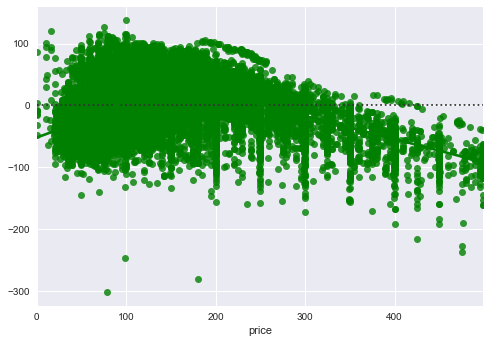

In [72]:
sns.residplot( y_train, y_train_pred,lowess=True, color="g")

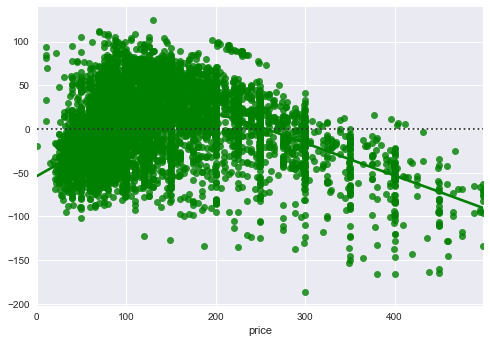

In [73]:
sns.residplot( y_test, y_pred,lowess=True, color="g")

LASSO MODEL

In [149]:
## training the model
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 0.05, normalize = False)
lasso = lasso.fit(X_train, y_train)
y_train_pred2 = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Training Root Mean Squared Error:' , train_rmse)
print("Testing Rooot Mean Squared Error:" , test_rmse)
# print ("R^2 Score:", lasso.score(y_train, y_train_pred))
print ("R^2 Train Score:", metrics.r2_score(y_train, (y_train_pred2)))
print("R^2 Test Score:", metrics.r2_score(y_test, y_pred))

Training Root Mean Squared Error: 60.766798700665575
Testing Rooot Mean Squared Error: 60.955834094374474
R^2 Train Score: 0.44847031509467283
R^2 Test Score: 0.4472800228718118


In [150]:
sde = test_rmse / y_test.std()  #shows how many standard deviations the average error is away from the true value
sde

0.7434026235703561

POLYNOMIAL MODEL

In [158]:
dfp = df.drop(["neighbourhood_group", "neighbourhood", "room_type", "name", "id", "host_name", "latitude", "longitude", "price", "last_review", "Total Number of Reviews", "Brooklyn", "Manhattan", "Queens", "Staten Island", "Private room", "Shared room", "Average", "High"], axis = 1)
dfp.columns  #taking out categorical features and dummies for polynomial regression model

Index(['minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'metro_prox'],
      dtype='object')

In [159]:
dfp.head()

,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,metro_prox
0,1,9,0.21,6,365,4.896516
1,1,45,0.38,2,355,0.427299
3,1,270,4.64,1,194,3.270572
4,10,9,0.10,1,0,0.764516
5,3,74,0.59,1,129,1.030297


In [160]:
#creating new polynomial features

from sklearn.preprocessing import PolynomialFeatures

polynomial_features = PolynomialFeatures(degree = 2)
x_poly = polynomial_features.fit_transform(dfp)

polynomial_features = PolynomialFeatures(degree = 2)
x_poly = polynomial_features.fit(dfp)
x_poly_df = pd.DataFrame(x_poly.transform(dfp),columns = x_poly.get_feature_names(dfp.columns))

In [161]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(x_poly_df, target, train_size = 0.8, test_size = 0.2, random_state = 15)

In [168]:
from sklearn.linear_model import LinearRegression

lm_poly = LinearRegression()

lm_poly = lm.fit(X_train2, (y_train2))


y_train_p = lm_poly.predict(X_train2)
y_test_p = lm_poly.predict(X_test2)

train_mae = metrics.mean_absolute_error(y_train2, (y_train_p))  #getting the mean absolute error
train_mse = metrics.mean_squared_error(y_train2, (y_train_p))   #getting the mean squared error
train_rmse = np.sqrt(metrics.mean_squared_error(y_train2, (y_train_p)))  #getting the root mean squared error

# print(train_mae)
# print(train_mse)
print(train_rmse)

print ("R^2 Score:", lm_poly.score(X_train2, (y_train2)))
print ("R^2 Score:", lm_poly.score(X_test2, (y_test2)))

test_mae = metrics.mean_absolute_error(y_test2, y_test_p)
test_mse = (metrics.mean_squared_error(y_test2, y_test_p))
test_rmse = np.sqrt(metrics.mean_squared_error(y_test2, y_test_p))

# print(test_mae)
# print(test_mse)
print(test_rmse)

75.12130947183648
R^2 Score: 0.1571263508940216
R^2 Score: 0.15396240191356436
75.41496421383503


In [164]:
x_poly_df.columns  #wanted to see all the new features

Index(['1', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'metro_prox',
       'minimum_nights^2', 'minimum_nights number_of_reviews',
       'minimum_nights reviews_per_month',
       'minimum_nights calculated_host_listings_count',
       'minimum_nights availability_365', 'minimum_nights metro_prox',
       'number_of_reviews^2', 'number_of_reviews reviews_per_month',
       'number_of_reviews calculated_host_listings_count',
       'number_of_reviews availability_365', 'number_of_reviews metro_prox',
       'reviews_per_month^2',
       'reviews_per_month calculated_host_listings_count',
       'reviews_per_month availability_365', 'reviews_per_month metro_prox',
       'calculated_host_listings_count^2',
       'calculated_host_listings_count availability_365',
       'calculated_host_listings_count metro_prox', 'availability_365^2',
       'availability_365 metro_prox', 'metro_prox^2'],
      dtype='object

In [165]:
len(x_poly_df.columns)  #wanted to see the length of all the new features

28

In [171]:
sde = test_rmse / y_test2.std()  #shows how many standard deviations the average error is away from the true value
sde

0.9197426806797402

# MODELING PROCESS/INTERPRETATION

My approach to this project was to first find a data set of different Airbnb's in NYC that I could work with that had enough columns(features) for me to engineer with so that I could make the best possible prediction model. I had some prior background knowledge from experience in utilizing Airbnb's in the past, however I wanted to put that to the test to see if my predictions of certain features would directly influence my target variable(price). I was also keeping in mind the entire time the different types of graphs I could use to help visualize my various correlations.

The final model I decided to use to best predict the price of Airbnb's in NYC is my Baseline OLS Model.  This model had an R^2 value of 0.507 which was the greatest of all my other models, however it did not have the least amount of features(which would have been ideal for a better fitting prediction model).  One feature that had an impact on my dependent variable of price was room type of the specific Airbnb.  I split the room type column into dummy variables to represent the three different room types; "Entire Home/Apartment" being the most expensive.  So my coefficients on my OLS model were based on the Entire Home/Apartment room type.  People who request Private Rooms pay on average 82 dollars less than people who request Entire Home/Apartments.  People who request Shared Rooms pay on average 108 dollars less than people who request Entire Home/Apartments.  A second feature that had an impact on price was the metro proximity of the particular Airbnb.  This was a calculation of the minimal distance between an Airbnb and the nearest transit station.  People who request Airbnb's that are farther away from these stations on average pay 10 dollars less than people who request to be closer to the stations.  Another feature that had an impact on price was minimum nights stayed in an Airbnb.  It came with an negative coefficient of -0.3101 which means that you actually save money by booking more nights to stay in an Airbnb as opposed to just booking one or two nights(think of it as a wholesale deal).  All of these features had a P value under 0.05 which means that they are all statistically significant. From this, we can say that we are 95 percent confident that our data is valuable to the model because it effects price.